In [110]:
! pip install plotly
! pip install Streamlit
! pip install folium
! pip install fuzzywuzzy
! pip install python-Levenshtein
! pip install pycountry-convert
! pip install streamlit-folium
! pip install branca
! pip install joblib

In [111]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio
import folium
from mpl_toolkits.mplot3d import Axes3D

# Machine learning and modeling
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Additional utilities
import os
import scipy.cluster.hierarchy as ch
from scipy.spatial.distance import cdist
from sklearn.metrics import mean_squared_error


In [112]:
# read the json file from your data folder into a data frame
#df = pd.read_csv(r'C:\Users\chz\Documents\BI Exercise\\BI Exam\global air pollution dataset.csv')

# Correctly constructing the file path
dataset_path = os.path.join('DataSæt', 'global air pollution dataset.csv')
dataset_path2 = os.path.join('DataSæt', '2017_-_Cities_Community_Wide_Emissions.csv')

# Loading the datasets
df = pd.read_csv(dataset_path)
df2 = pd.read_csv(dataset_path2)

In [113]:
df.shape

(23463, 12)

In [114]:
df2.shape

(229, 31)

In [115]:
# Define the correction mapping with the correct capitalization
correction_mapping = {
    "United States of America": "USA",
    "Viet Nam": "Vietnam",
    "Russian Federation": "Russia",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Iran (Islamic Republic of)": "Iran",
    "Syrian Arab Republic": "Syria",
    "Republic of Korea": "South Korea",
    "Lao People's Democratic Republic": "Laos",
    # Add other corrections as needed
}

# Apply the correction mapping to df and df2 and overwrite the original 'Country' column
df['Country'] = df['Country'].replace(correction_mapping).str.strip()
df2['Country'] = df2['Country'].replace(correction_mapping).str.strip()

# Proceed with the merge using the corrected country names
df_merged = pd.merge(df, df2, on='Country', how='inner')

# Rename 'City_x' to 'City' and 'Country_x' to 'Country'
df_merged.rename(columns={'City_x': 'City',}, inplace=True)

# Drop the extra 'Country' column
df_merged.drop(columns=['City_y'], inplace=True)

# Rearrange the columns
column_order = ['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category', 'Account number', 'Organization', 'Region', 'C40', 'Access', 'Reporting year', 'Accounting year', 'Boundary', 'Protocol', 'Protocol column', 'Gases included', 'Total emissions (metric tonnes CO2e)', 'Total Scope 1 Emissions (metric tonnes CO2e)', 'Total Scope 2 Emissions (metric tonnes CO2e)', 'Comment', 'Increase/Decrease from last year', 'Reason for increase/decrease in emissions', 'Population', 'Population year', 'GDP', 'GDP Currency', 'GDP Year', 'GDP Source', 'Average annual temperature (in Celsius)​', '​Average altitude (m)', '​Land area (in square km)', 'City Location', 'Country Location']
# Reorder the DataFrame columns
df_merged = df_merged[column_order]


In [116]:
df_merged.drop(columns=['Gases included'], inplace=True)
df_merged.drop(columns=['Protocol column'], inplace=True)
df_merged.drop(columns=['Comment'], inplace=True)
df_merged.drop(columns=['Total Scope 1 Emissions (metric tonnes CO2e)'], inplace=True)
df_merged.drop(columns=['Total Scope 2 Emissions (metric tonnes CO2e)'], inplace=True)
df_merged.drop(columns=['Account number'], inplace=True)
df_merged.drop(columns=['Organization'], inplace=True)
df_merged.drop(columns=['Accounting year'], inplace=True)
df_merged.drop(columns=['Boundary'], inplace=True)
df_merged.drop(columns=['Protocol'], inplace=True)
df_merged.drop(columns=['Increase/Decrease from last year'], inplace=True)
df_merged.drop(columns=['Reason for increase/decrease in emissions'], inplace=True)
df_merged.drop(columns=['Population year'], inplace=True)
df_merged.drop(columns=['GDP Currency'], inplace=True)
df_merged.drop(columns=['GDP Source'], inplace=True)
df_merged.drop(columns=['Access'], inplace=True)

In [117]:
# Convert nulls/NaNs to 'False'
df_merged['C40'] = df_merged['C40'].fillna('False')

# Convert any cell that contains "C40" to 'True', assuming "C40" indicates a true condition
# Adjust the condition as needed to match your data's specific representation of true
df_merged['C40'] = df_merged['C40'].apply(lambda x: 'True' if 'C40' in str(x) else 'False')

In [118]:
# Delete the null values from the data frame
df_merged = df_merged.dropna()

In [119]:
# Extracting latitude and longitude from "City Location" and "Country Location" into new columns
df_merged[['City Latitude', 'City Longitude']] = df_merged['City Location'].str.extract(r'\(([^,]+), ([^)]+)\)')
df_merged[['Country Latitude', 'Country Longitude']] = df_merged['Country Location'].str.extract(r'\(([^,]+), ([^)]+)\)')

# Displaying the first few rows to ensure the transformation was successful
df_merged.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,...,GDP Year,Average annual temperature (in Celsius)​,​Average altitude (m),​Land area (in square km),City Location,Country Location,City Latitude,City Longitude,Country Latitude,Country Longitude
1241,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,2012.0,26.0,8.0,692.0,"(-12.97304, -38.502304)","(-14.235004, -51.92528)",-12.97304,-38.502304,-14.235004,-51.92528
1242,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,2013.0,23.0,5.0,133.1,"(-22.892857, -43.118381)","(-14.235004, -51.92528)",-22.892857,-43.118381,-14.235004,-51.92528
1243,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,2013.0,20.0,3.0,438.0,"(-27.5949884, -48.5481743)","(-14.235004, -51.92528)",-27.5949884,-48.5481743,-14.235004,-51.92528
1244,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,2014.0,21.0,900.0,331.0,"(-19.916681, -43.934493)","(-14.235004, -51.92528)",-19.916681,-43.934493,-14.235004,-51.92528
1246,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,2010.0,23.2,749.0,739.0,"(-16.6868912, -49.2647943)","(-14.235004, -51.92528)",-16.6868912,-49.2647943,-14.235004,-51.92528


In [120]:
# Convert the latitude and longitude columns from strings to floats
df_merged['City Latitude'] = pd.to_numeric(df_merged['City Latitude'], errors='coerce')
df_merged['City Longitude'] = pd.to_numeric(df_merged['City Longitude'], errors='coerce')
df_merged['Country Latitude'] = pd.to_numeric(df_merged['Country Latitude'], errors='coerce')
df_merged['Country Longitude'] = pd.to_numeric(df_merged['Country Longitude'], errors='coerce')

In [121]:
df_merged.drop(columns=['City Location'], inplace=True)
df_merged.drop(columns=['Country Location'], inplace=True)

In [122]:
# Convert 'C40' from strings "True"/"False" to actual booleans
df_merged['C40'] = df_merged['C40'].map({'True': True, 'False': False})

# Create two new columns: 'C40_True' and 'C40_False'
df_merged['C40_True'] = df_merged['C40'].astype(int)  # This will convert True to 1 and False to 0
df_merged['C40_False'] = (~df_merged['C40']).astype(int)  # This inverts the boolean and then converts to 0/1



In [123]:
df_merged.drop(columns=['C40'], inplace=True)

In [124]:
df = df_merged

In [125]:
import pycountry_convert as pc

#applying continent to the dataset for future use of folium mapping
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None  # For countries that don't match

# Apply the conversion function to your DataFrame
df['Continent'] = df['Country'].apply(country_to_continent)
# Filter for other continents
north_american_countries_df = df[df['Continent'] == 'North America']
south_american_countries_df = df[df['Continent'] == 'South America']
asian_countries_df = df[df['Continent'] == 'Asia']
african_countries_df = df[df['Continent'] == 'Africa']
oceania_countries_df = df[df['Continent'] == 'Oceania']
Europe_df = df[df['Continent'] == 'Europe']

In [126]:
df = df.drop_duplicates(subset=['City'])


In [127]:
df.count()

Country                                     13408
City                                        13408
AQI Value                                   13408
AQI Category                                13408
CO AQI Value                                13408
CO AQI Category                             13408
Ozone AQI Value                             13408
Ozone AQI Category                          13408
NO2 AQI Value                               13408
NO2 AQI Category                            13408
PM2.5 AQI Value                             13408
PM2.5 AQI Category                          13408
Region                                      13408
Reporting year                              13408
Total emissions (metric tonnes CO2e)        13408
Population                                  13408
GDP                                         13408
GDP Year                                    13408
Average annual temperature (in Celsius)​    13408
​Average altitude (m)                       13408


In [128]:
df.to_pickle("dataframe.pkl") # save df to a pickle file so it can be used for streamlit

In [129]:
df.sample()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,...,Average annual temperature (in Celsius)​,​Average altitude (m),​Land area (in square km),City Latitude,City Longitude,Country Latitude,Country Longitude,C40_True,C40_False,Continent
1913,Brazil,Imbituba,31,Good,1,Good,15,Good,1,Good,...,26.0,8.0,692.0,-12.97304,-38.502304,-14.235004,-51.92528,1,0,South America


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13408 entries, 1241 to 288621
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   13408 non-null  object 
 1   City                                      13408 non-null  object 
 2   AQI Value                                 13408 non-null  int64  
 3   AQI Category                              13408 non-null  object 
 4   CO AQI Value                              13408 non-null  int64  
 5   CO AQI Category                           13408 non-null  object 
 6   Ozone AQI Value                           13408 non-null  int64  
 7   Ozone AQI Category                        13408 non-null  object 
 8   NO2 AQI Value                             13408 non-null  int64  
 9   NO2 AQI Category                          13408 non-null  object 
 10  PM2.5 AQI Value                    

In [131]:
# Check the data frame for null values
df_merged.isnull().sum()

Country                                     0
City                                        0
AQI Value                                   0
AQI Category                                0
CO AQI Value                                0
CO AQI Category                             0
Ozone AQI Value                             0
Ozone AQI Category                          0
NO2 AQI Value                               0
NO2 AQI Category                            0
PM2.5 AQI Value                             0
PM2.5 AQI Category                          0
Region                                      0
Reporting year                              0
Total emissions (metric tonnes CO2e)        0
Population                                  0
GDP                                         0
GDP Year                                    0
Average annual temperature (in Celsius)​    0
​Average altitude (m)                       0
​Land area (in square km)                   0
City Latitude                     

In [132]:
import pycountry_convert as pc

#applying continent to the dataset for future use of folium mapping
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None  # For countries that don't match

# Apply the conversion function to your DataFrame
df['Continent'] = df['Country'].apply(country_to_continent)
# Filter for other continents
north_american_countries_df = df[df['Continent'] == 'North America']
south_american_countries_df = df[df['Continent'] == 'South America']
asian_countries_df = df[df['Continent'] == 'Asia']
african_countries_df = df[df['Continent'] == 'Africa']
oceania_countries_df = df[df['Continent'] == 'Oceania']
Europe_df = df[df['Continent'] == 'Europe']

In [133]:
df.count()

Country                                     13408
City                                        13408
AQI Value                                   13408
AQI Category                                13408
CO AQI Value                                13408
CO AQI Category                             13408
Ozone AQI Value                             13408
Ozone AQI Category                          13408
NO2 AQI Value                               13408
NO2 AQI Category                            13408
PM2.5 AQI Value                             13408
PM2.5 AQI Category                          13408
Region                                      13408
Reporting year                              13408
Total emissions (metric tonnes CO2e)        13408
Population                                  13408
GDP                                         13408
GDP Year                                    13408
Average annual temperature (in Celsius)​    13408
​Average altitude (m)                       13408


In [134]:
df.sample(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,...,Average annual temperature (in Celsius)​,​Average altitude (m),​Land area (in square km),City Latitude,City Longitude,Country Latitude,Country Longitude,C40_True,C40_False,Continent
286520,Spain,Los Barrios,45,Good,1,Good,45,Good,0,Good,...,15.0,655.0,604.0,40.107625,-3.387567,40.463667,-3.749220,1,0,Europe
268829,Germany,Mayen,59,Moderate,1,Good,37,Good,3,Good,...,8.8,6.0,755.0,53.551085,9.993682,51.165691,10.451526,0,1,Europe
266185,Germany,Espelkamp,30,Good,0,Good,30,Good,1,Good,...,8.8,6.0,755.0,53.551085,9.993682,51.165691,10.451526,0,1,Europe
271903,Indonesia,Kemang,95,Moderate,2,Good,90,Moderate,1,Good,...,32.1,260.0,118.5,-6.597100,106.806000,-6.121435,106.774124,0,1,Asia
49023,USA,Burlingame,50,Good,1,Good,34,Good,2,Good,...,13.0,10.0,784.0,40.712784,-74.005941,37.090240,-95.712891,1,0,North America
271295,Indonesia,Kembaran,54,Moderate,1,Good,29,Good,1,Good,...,32.1,260.0,118.5,-6.597100,106.806000,-6.121435,106.774124,0,1,Asia
29429,Poland,Stargard Szczecinski,35,Good,0,Good,35,Good,1,Good,...,11.0,119.0,283.3,51.107885,17.038538,51.919438,19.145136,0,1,Europe
10915,Brazil,Pentecoste,30,Good,0,Good,23,Good,0,Good,...,26.0,8.0,692.0,-12.973040,-38.502304,-14.235004,-51.925280,1,0,South America
285827,Portugal,Santa Iria De Azoia,40,Good,1,Good,40,Good,2,Good,...,15.0,348.0,241.0,41.444266,-8.292241,39.399872,-8.224454,0,1,Europe
30723,France,Saint Medard En Jalles,35,Good,1,Good,31,Good,2,Good,...,13.5,26.0,105.0,48.856614,2.352222,46.227638,2.213749,1,0,Europe


In [135]:
# Assuming 'df' is your DataFrame
column_name = 'City' 

# Count the occurrences of each unique value in the specified column
value_counts = df[column_name].value_counts()

value_counts

City
Presidente Dutra    1
Ilmajoki            1
Kokkola             1
Siilinjarvi         1
Tuusula             1
                   ..
Cliffside Park      1
Collingswood        1
Columbia Heights    1
Cordele             1
Jerusalem           1
Name: count, Length: 13408, dtype: int64

In [136]:
df = df.drop_duplicates(subset=['City'])

In [137]:
df.count()

Country                                     13408
City                                        13408
AQI Value                                   13408
AQI Category                                13408
CO AQI Value                                13408
CO AQI Category                             13408
Ozone AQI Value                             13408
Ozone AQI Category                          13408
NO2 AQI Value                               13408
NO2 AQI Category                            13408
PM2.5 AQI Value                             13408
PM2.5 AQI Category                          13408
Region                                      13408
Reporting year                              13408
Total emissions (metric tonnes CO2e)        13408
Population                                  13408
GDP                                         13408
GDP Year                                    13408
Average annual temperature (in Celsius)​    13408
​Average altitude (m)                       13408


In [138]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

In [139]:
df.to_pickle("dataframe.pkl") # save df to a pickle file so it can be used for streamlit

<Figure size 1000x600 with 0 Axes>

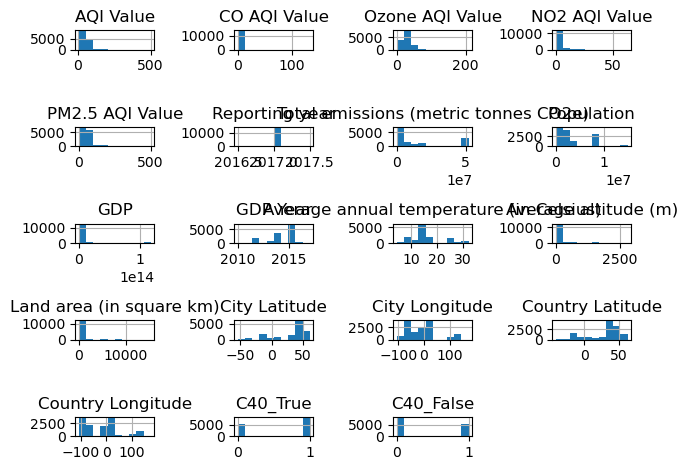

In [140]:
plt.figure(figsize= (10, 6))

# Plot histograms for all columns in the DataFrame
df.hist()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

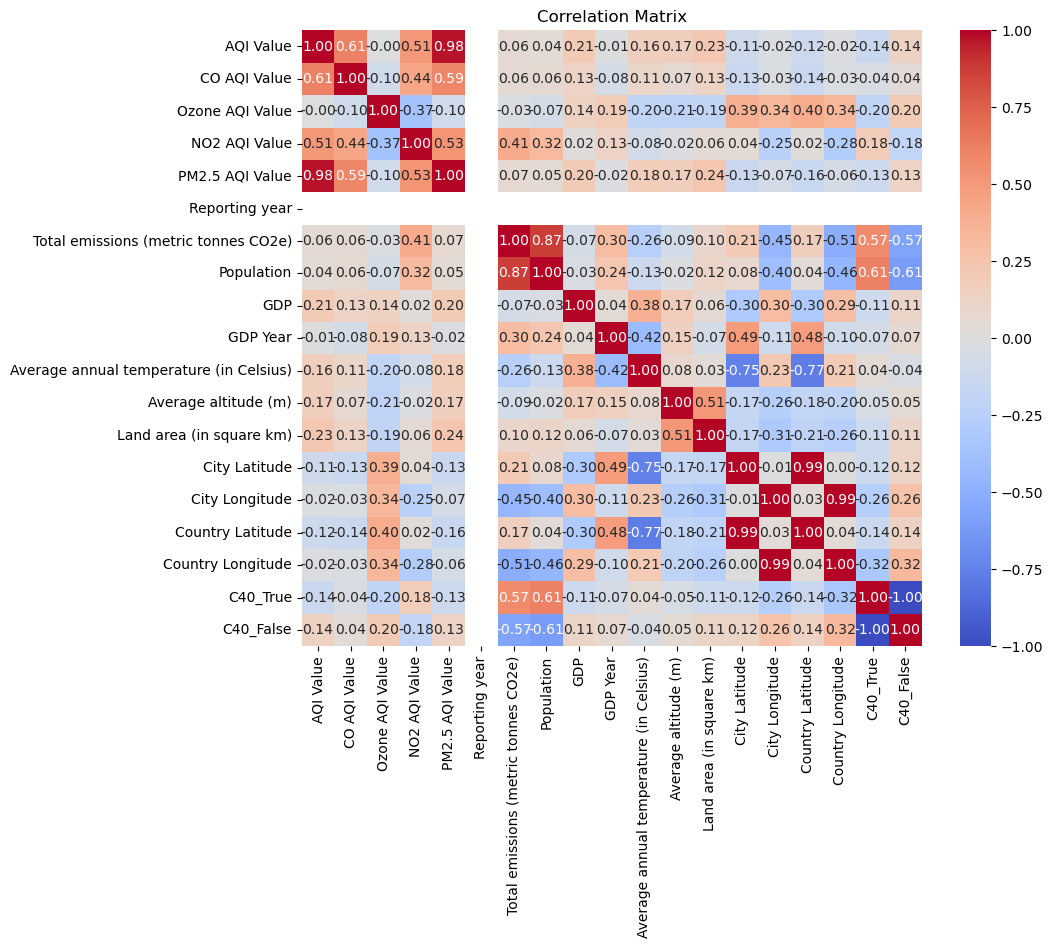

<Axes: title={'center': 'Correlation Matrix using heatmap'}>

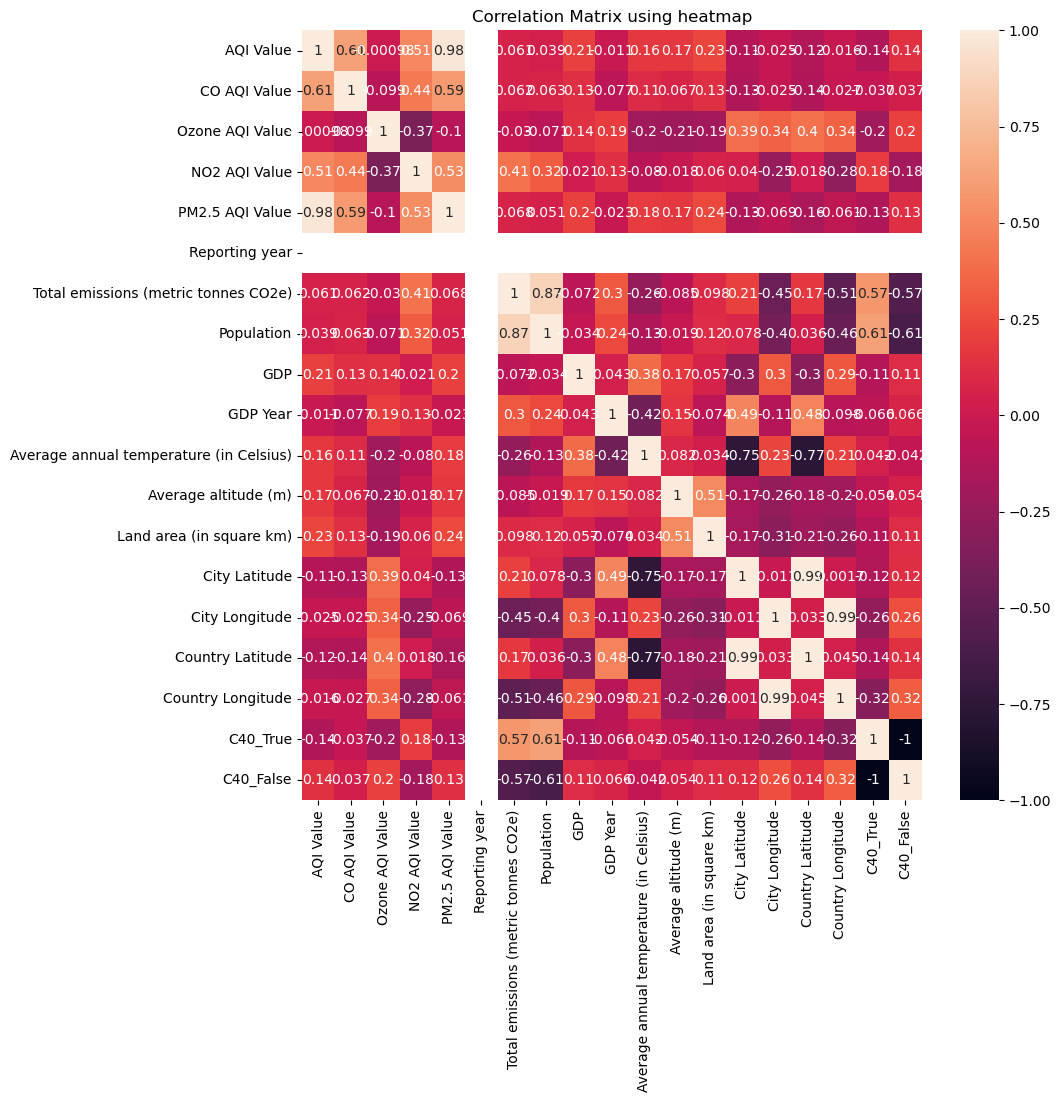

In [141]:
# The purpose of this 2 models is to analyze the relationships between different numerical variables in the dataset.

# We have to convert the data from float to int in order to use pandas to calculate the correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])

df_cleaned = numeric_df.dropna()
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Visualizing the correlation matrix using a heatmap to understand the relationships between different variables.
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix using heatmap')
sns.heatmap(corr_matrix, annot=True)

/Users/x-drive/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means score: 9457474.769727845


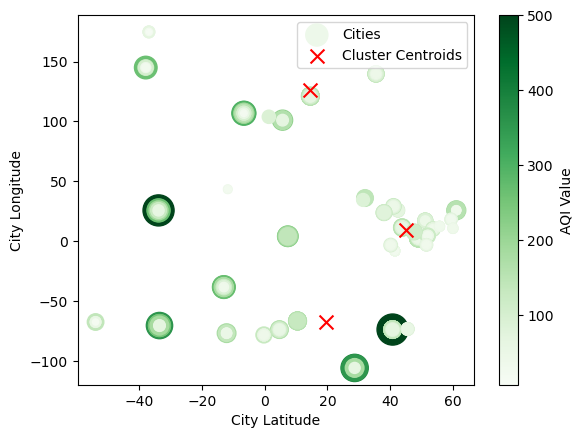

In [215]:
 # Analysis of air quality in C40 cities using K-means clustering

# create a Python list of feature names
feature_cols = ['City Latitude', 'City Longitude']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# Train K-means model
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed
kmeans.fit(X)

# Get inertia score
kmeans_score = kmeans.inertia_

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Assign cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Print K-means score
print("K-means score:", kmeans_score)

# Plot city points
plt.xlabel('City Latitude')
plt.ylabel('City Longitude')
plt.scatter(df['City Latitude'], df['City Longitude'], c=df['AQI Value'], s=df['AQI Value'], cmap='Greens', label='Cities')
plt.colorbar(label='AQI Value')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Cluster Centroids')

# Show legend
plt.legend()

# Show plot
plt.show()

In [143]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(13408, 2)


In [144]:
# select a Series from the DataFrame for y
y = df['AQI Value']

# print the first 5 values
y.head()

1241     41
1255     33
1269    154
1283     30
1297     32
Name: AQI Value, dtype: int64

In [145]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(13408,)


/var/folders/_g/3lyt3kl11qzdclw1fr8t0w7h0000gn/T/ipykernel_45746/3510188199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PM2.5 AQI Value'],  label='PM2.5 AQI Value', norm_hist=True)


<Axes: xlabel='PM2.5 AQI Value', ylabel='Density'>

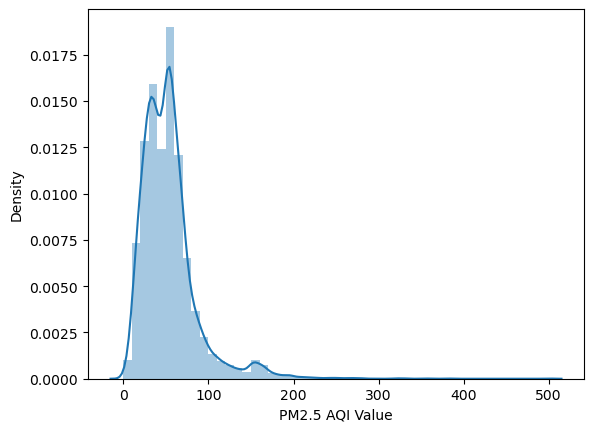

In [146]:
sns.distplot(df['PM2.5 AQI Value'],  label='PM2.5 AQI Value', norm_hist=True)

/var/folders/_g/3lyt3kl11qzdclw1fr8t0w7h0000gn/T/ipykernel_45746/809496334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AQI Value'],  label='AQI Value', norm_hist=True)


<Axes: xlabel='AQI Value', ylabel='Density'>

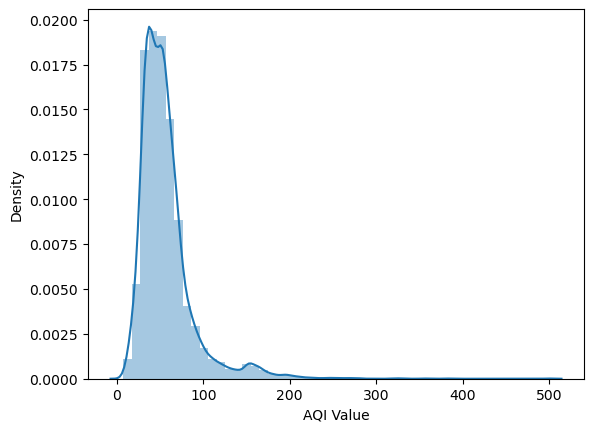

In [147]:
sns.distplot(df['AQI Value'],  label='AQI Value', norm_hist=True)

/var/folders/_g/3lyt3kl11qzdclw1fr8t0w7h0000gn/T/ipykernel_45746/3462519423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['City Latitude'],  label='City Latitude', norm_hist=True)


<Axes: xlabel='City Latitude', ylabel='Density'>

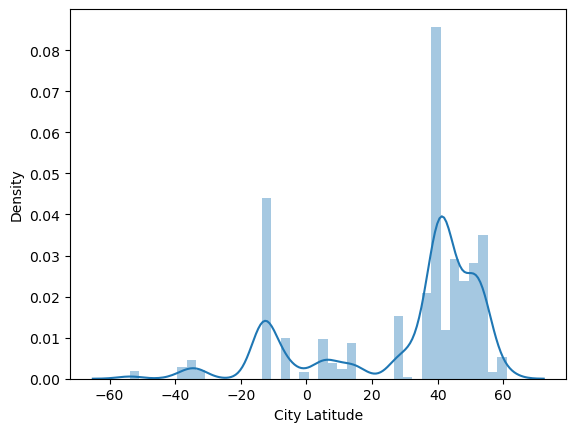

In [148]:
sns.distplot(df['City Latitude'],  label='City Latitude', norm_hist=True)

/var/folders/_g/3lyt3kl11qzdclw1fr8t0w7h0000gn/T/ipykernel_45746/2461328098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['City Longitude'],  label='City Longitude', norm_hist=True)


<Axes: xlabel='City Longitude', ylabel='Density'>

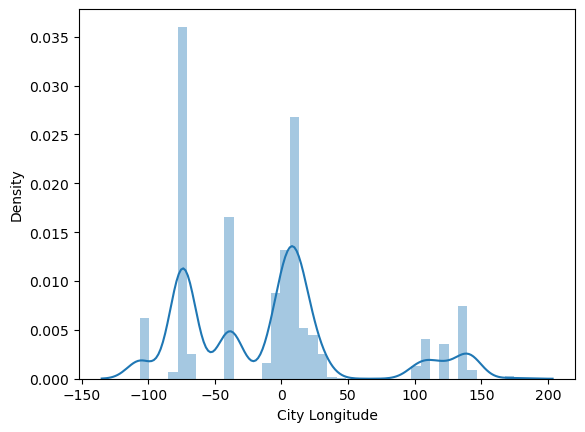

In [149]:
sns.distplot(df['City Longitude'],  label='City Longitude', norm_hist=True)

In [150]:
#i like to be a little extra so insteed of default 75/25 i use 85/15 ;p
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [151]:
# split is 85:15
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11396, 2)
(11396,)
(2012, 2)
(2012,)


In [152]:
# create a model
linreg = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

In [153]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 60.68322003425975
bi = [-0.13986125 -0.00965004]


In [154]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('City Latitude', -0.13986125232505955),
 ('City Longitude', -0.009650037422231446)]

In [155]:
y_test

286295    34
30095     64
29613     35
117306    45
275121    23
          ..
190692    68
280539    63
28689     86
24561     55
280707    40
Name: AQI Value, Length: 2012, dtype: int64

In [156]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)

In [157]:
y_predicted

array([52.21098407, 53.82737379, 53.37078471, ..., 54.45293007,
       54.45293007, 54.66811918])

In [158]:
from sklearn.metrics import mean_squared_error

# calculate mean squared error using scikit-learn
print(mean_squared_error(y_test, y_predicted))


923.7615043325128


In [159]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_predicted))


923.7615043325128


In [160]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

30.393445088250736


In [161]:
# R-squared
r2_score(y_test, y_predicted)

0.00806752764107066

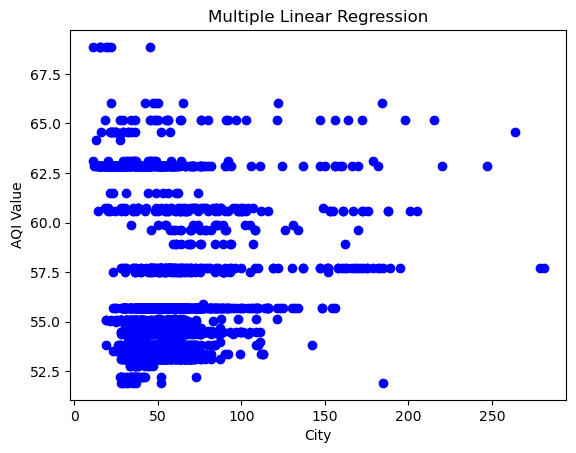

In [162]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.xlabel('City')
plt.ylabel('AQI Value')
plt.show()

In [163]:
# manual calculation
# b0 = 2.9272373202664816
# bi = [0.04660234 0.18117959]
sale = 2.92723 + 0.04660 * 50 
sale

5.25723

In [164]:
# the trained model
X_new = pd.DataFrame({'City Latitude': [50], 'City Longitude': [0]})
sale = linreg.predict(X_new)
sale

array([53.69015742])

In [165]:
X, y = df['PM2.5 AQI Value'], df['AQI Value']

In [166]:
# create a Python list of feature names
feature_cols = ['City Latitude', 'City Longitude']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df['City Latitude']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_predicted = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1.6936110240878405e-13


In [167]:
# R-squared
k=r2_score(y_test, y_predicted)
k

1.0

In [168]:


# default proportion is 75:25 but i like 0.15 better
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [169]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11396, 2)
(11396,)
(2012, 2)
(2012,)


In [170]:
# randomly selected
y_train

23175     43.769600
30565     48.856614
268333    53.551085
269377    51.916372
275841   -36.815328
            ...    
13911    -12.973040
149625    40.712784
284972    41.444266
4531     -12.973040
288526    10.469640
Name: City Latitude, Length: 11396, dtype: float64

In [171]:
from sklearn.linear_model import LinearRegression

# Assuming you have already trained a Linear Regression model named myreg
# Train the model on your training data

myreg = LinearRegression()
myreg.fit(X_train, y_train)

# Example values for City Latitude and AQI Value
latitude_value = 40.7128  # Example latitude value for a city
aqi_value_value = 50  # Example AQI Value

# Predict using both features
price_predicted = myreg.predict([[latitude_value, aqi_value_value]])
price_predicted


/Users/x-drive/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40.7128])

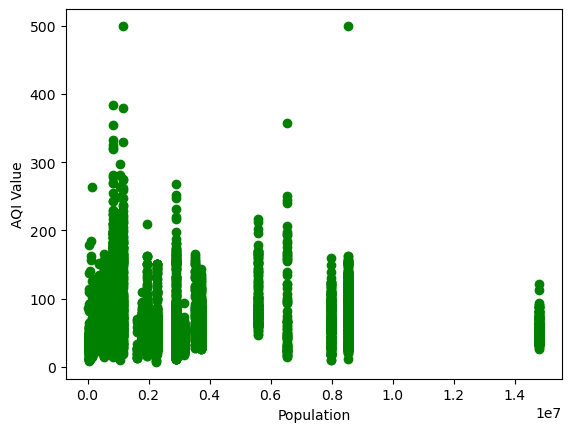

In [172]:
#lets try with something thats not linær obvious
plt.xlabel('Population')
plt.ylabel('AQI Value')
plt.scatter(df['Population'], df['AQI Value'], color='green')
plt.show()

/var/folders/_g/3lyt3kl11qzdclw1fr8t0w7h0000gn/T/ipykernel_45746/3586239839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Population'],  label='Population', norm_hist=True)


<Axes: xlabel='Population', ylabel='Density'>

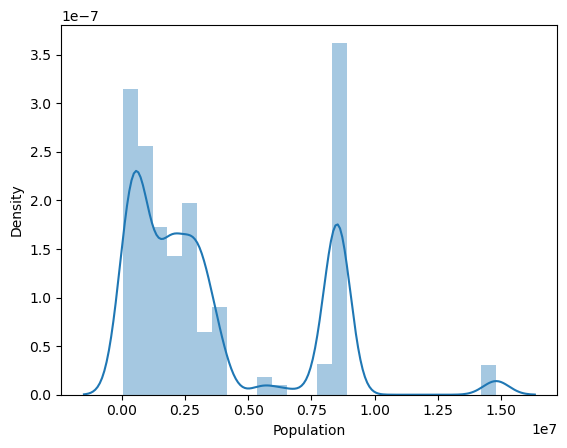

In [173]:
sns.distplot(df['Population'],  label='Population', norm_hist=True)

In [174]:
X = df['AQI Value'].values.reshape(-1, 1)
y = df['Population'].values.reshape(-1, 1)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [176]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11396, 1)
(11396, 1)
(2012, 1)
(2012, 1)


In [177]:
y_test

array([[2902927],
       [2902927],
       [3731096],
       ...,
       [8537673],
       [1614400],
       [ 354300]])

In [178]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [179]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [180]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [181]:
a

array([[4025.8353809]])

In [182]:
b

array([3303196.21884342])

In [183]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[3794348.13531348],
       [3484358.81098401],
       [3544746.34169755],
       ...,
       [3593056.36626837],
       [3375661.25569966],
       [3432022.95103229]])

In [184]:
y_test

array([[2902927],
       [2902927],
       [3731096],
       ...,
       [8537673],
       [1614400],
       [ 354300]])

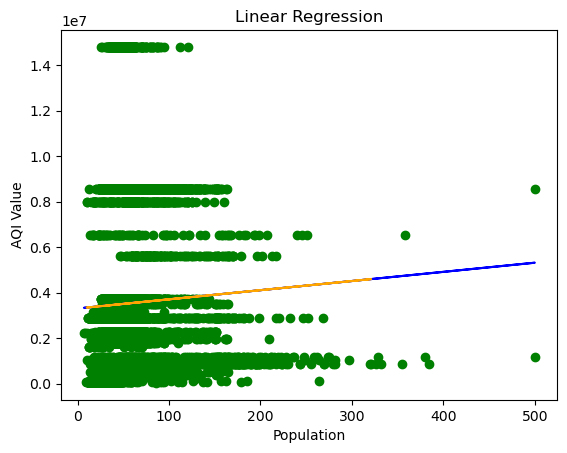

In [185]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('Population')
plt.ylabel('AQI Value')
plt.show()

In [186]:
R2 = myreg.score(X, y)
R2

0.0014905377546974297

In [187]:
X, y = df['Population'], df['AQI Value']

In [188]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 85:15
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [189]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11396,)
(11396,)
(2012,)
(2012,)


In [190]:
# randomly selected
y_train

23175      38
30565      51
268333     34
269377     41
275841     69
         ... 
13911      61
149625    150
284972     38
4531       58
288526    163
Name: AQI Value, Length: 11396, dtype: int64

In [191]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [192]:
model

array([4.12565064e-07, 5.50875315e+01])

In [193]:
a, b = model[0], model[1]

In [194]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

array([1.37529989e-07, 5.60708166e+01])

In [195]:
a1, b1 = test[0], test[1]

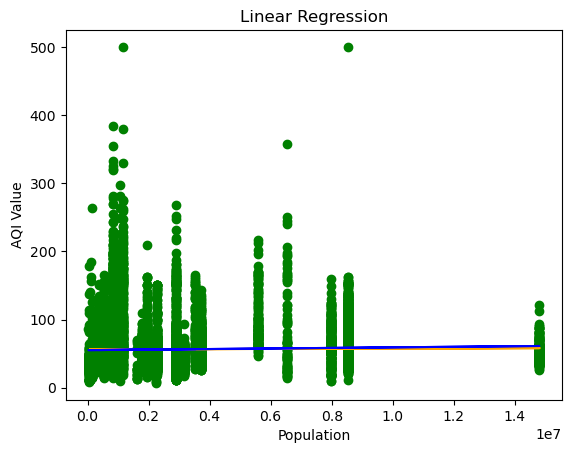

In [196]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.plot(X_train, a*X_train + b, color='blue')

plt.xlabel('Population')
plt.ylabel('AQI Value')
plt.show()

In [197]:
price_predicted = myreg.predict([[160]])
price_predicted

array([[3947329.87978777]])

In [198]:
price_predict = a*160 + b
price_predict

55.08759747912844

In [199]:
# assume a new price 
length = 91
price_predicted = myreg.predict([[length]])
price_predicted

array([[3669547.23850552]])

In [200]:
# Let's say we want to cluster the data into 3 groups
num_clusters = 3

In [201]:
# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters)

In [202]:
numeric_df = df.select_dtypes(include=['number'])
kmeans.fit(numeric_df)

/Users/x-drive/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [203]:
# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

In [204]:
# You can analyze the clusters, e.g., by adding cluster labels to the DataFrame
df['Cluster'] = cluster_labels

In [205]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_data = df[numeric_columns]
numeric_data

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Reporting year,Total emissions (metric tonnes CO2e),Population,GDP,GDP Year,Average annual temperature (in Celsius)​,​Average altitude (m),​Land area (in square km),City Latitude,City Longitude,Country Latitude,Country Longitude,C40_True,C40_False,Cluster
1241,41,1,5,1,41,2017,3661647.0,2902927,4.745000e+03,2012.0,26.0,8.0,692.0,-12.973040,-38.502304,-14.235004,-51.925280,1,0,0
1255,33,0,10,1,33,2017,3661647.0,2902927,4.745000e+03,2012.0,26.0,8.0,692.0,-12.973040,-38.502304,-14.235004,-51.925280,1,0,0
1269,154,5,0,13,154,2017,3661647.0,2902927,4.745000e+03,2012.0,26.0,8.0,692.0,-12.973040,-38.502304,-14.235004,-51.925280,1,0,0
1283,30,1,9,2,30,2017,3661647.0,2902927,4.745000e+03,2012.0,26.0,8.0,692.0,-12.973040,-38.502304,-14.235004,-51.925280,1,0,0
1297,32,1,7,2,32,2017,3661647.0,2902927,4.745000e+03,2012.0,26.0,8.0,692.0,-12.973040,-38.502304,-14.235004,-51.925280,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288617,39,0,31,0,39,2017,49285.0,55541,8.674051e+07,2016.0,23.0,19.0,30.0,-11.717216,43.247315,-11.645500,43.333300,0,1,0
288618,34,0,25,0,34,2017,49285.0,55541,8.674051e+07,2016.0,23.0,19.0,30.0,-11.717216,43.247315,-11.645500,43.333300,0,1,0
288619,26,0,26,0,23,2017,49285.0,55541,8.674051e+07,2016.0,23.0,19.0,30.0,-11.717216,43.247315,-11.645500,43.333300,0,1,0
288620,91,1,29,4,91,2017,48094650.0,5600000,4.103000e+11,2016.0,27.0,5.0,719.0,1.352083,103.819836,1.352083,103.819836,1,0,0


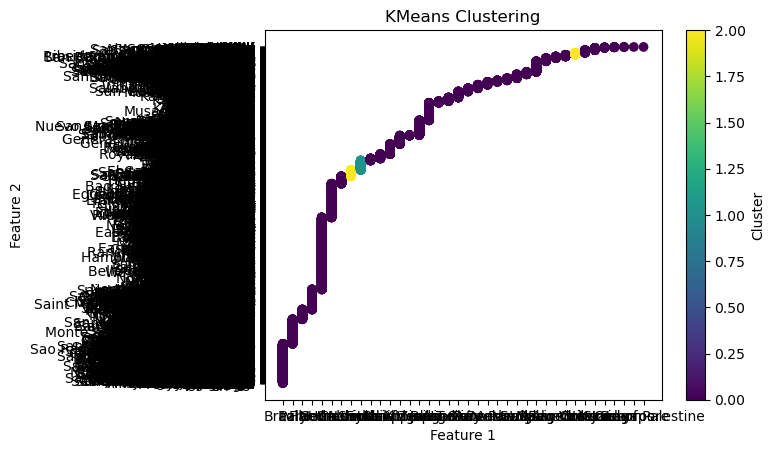

In [206]:
#Plot the clusters based on the first two columns (assuming they represent features)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


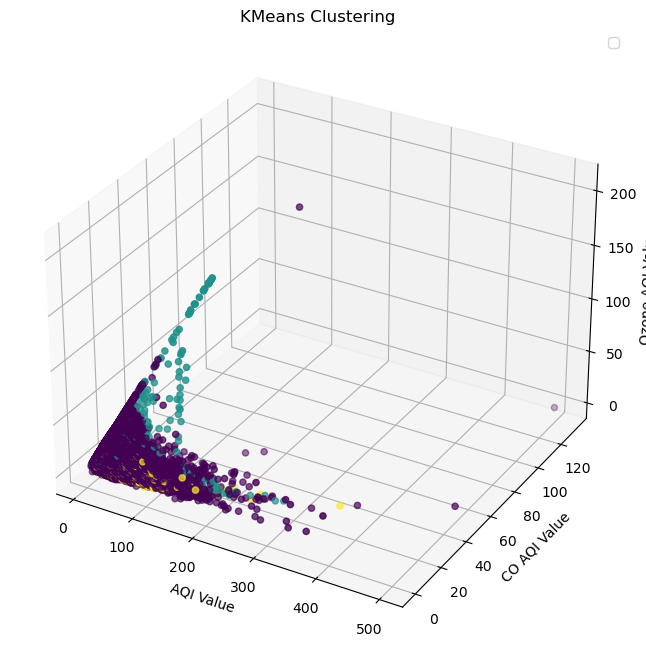

In [207]:
from mpl_toolkits.mplot3d import Axes3D

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_data = df[numeric_columns]

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters based on the first three numeric columns
ax.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], numeric_data.iloc[:, 2], c=cluster_labels, cmap='viridis')
ax.set_title('KMeans Clustering')
ax.set_xlabel(numeric_columns[0])  
ax.set_ylabel(numeric_columns[1])  
ax.set_zlabel(numeric_columns[2])  
ax.legend()

plt.show()

In [208]:
df.count()

Country                                     13408
City                                        13408
AQI Value                                   13408
AQI Category                                13408
CO AQI Value                                13408
CO AQI Category                             13408
Ozone AQI Value                             13408
Ozone AQI Category                          13408
NO2 AQI Value                               13408
NO2 AQI Category                            13408
PM2.5 AQI Value                             13408
PM2.5 AQI Category                          13408
Region                                      13408
Reporting year                              13408
Total emissions (metric tonnes CO2e)        13408
Population                                  13408
GDP                                         13408
GDP Year                                    13408
Average annual temperature (in Celsius)​    13408
​Average altitude (m)                       13408


In [209]:
# Specify the columns you want to include in numeric_data
selected_columns = ['Population', 'Total emissions (metric tonnes CO2e)', 
                    'Country Longitude', 'City Longitude', '​Average altitude (m)']

# Filter the DataFrame to include only the selected columns
numeric_data = df[selected_columns]

# Display the resulting DataFrame
print(numeric_data)

        Population  Total emissions (metric tonnes CO2e)  Country Longitude  \
1241       2902927                             3661647.0         -51.925280   
1255       2902927                             3661647.0         -51.925280   
1269       2902927                             3661647.0         -51.925280   
1283       2902927                             3661647.0         -51.925280   
1297       2902927                             3661647.0         -51.925280   
...            ...                                   ...                ...   
288617       55541                               49285.0          43.333300   
288618       55541                               49285.0          43.333300   
288619       55541                               49285.0          43.333300   
288620     5600000                            48094650.0         103.819836   
288621       30000                               32221.0          35.233200   

        City Longitude  ​Average altitude (m)  
124

In [210]:
# Select attributes and convert to numpy
X = df.iloc[:, 2:5].values
X

array([[41, 'Good', 1],
       [33, 'Good', 0],
       [154, 'Unhealthy', 5],
       ...,
       [26, 'Good', 0],
       [91, 'Moderate', 1],
       [86, 'Moderate', 1]], dtype=object)

In [211]:
# Use dendogram to find the optimal number of clusters
num_clusters = 3

/Users/x-drive/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


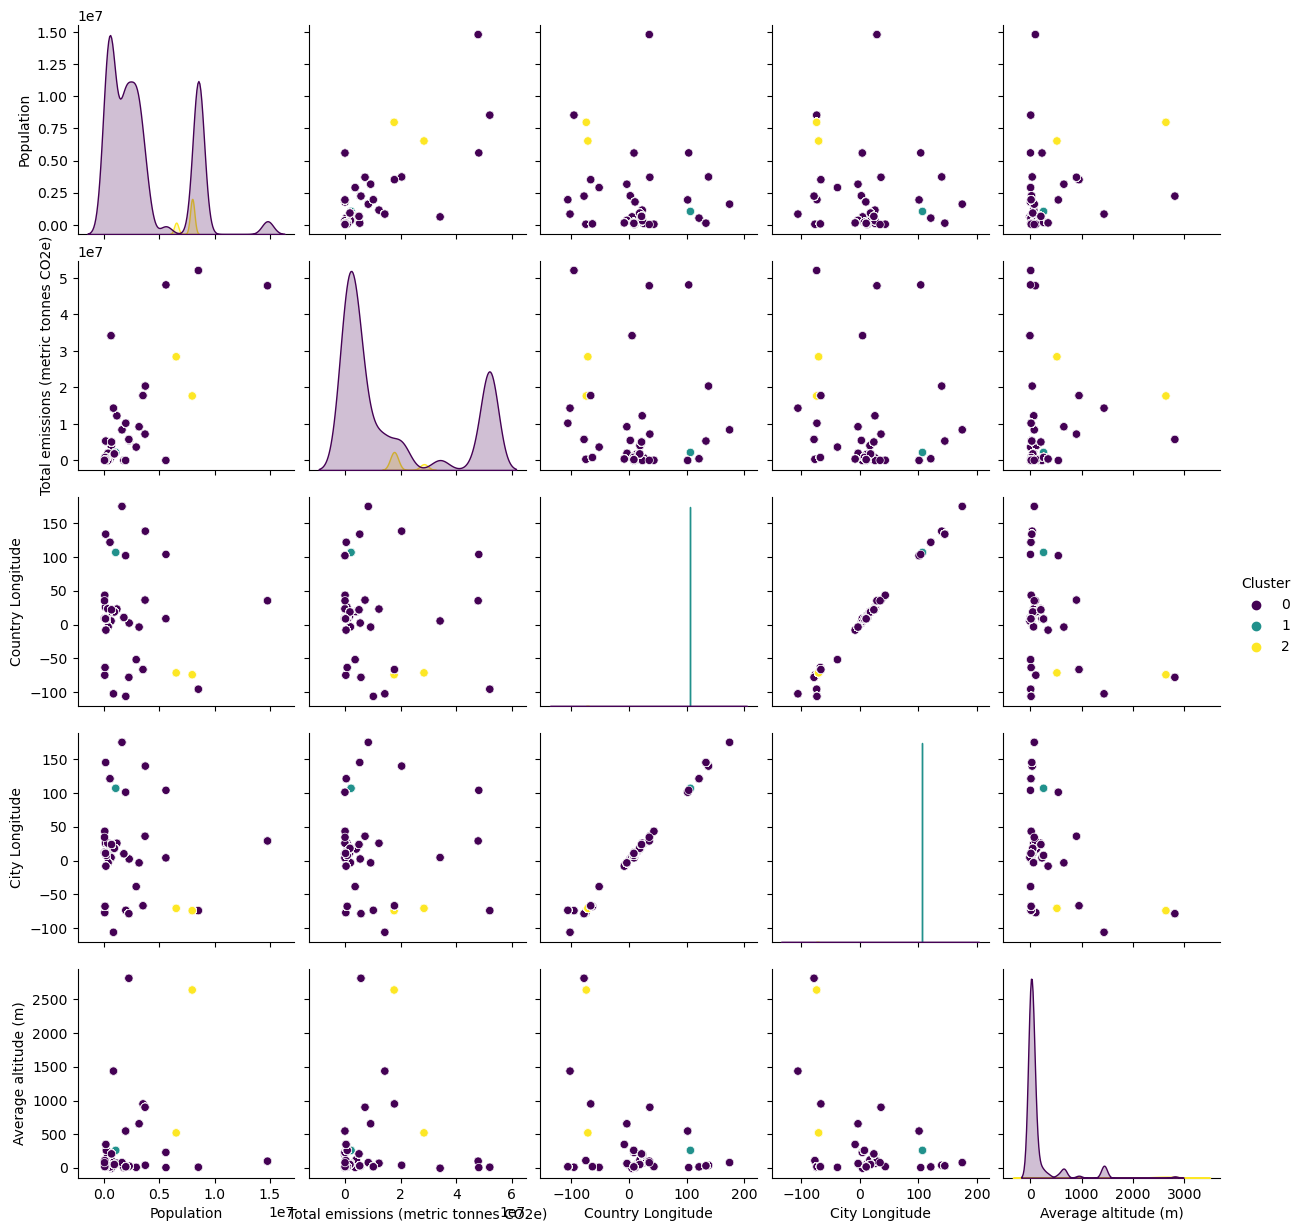

In [212]:
sns.pairplot(df, hue='Cluster', vars=numeric_data, palette='viridis')
plt.show()

In [213]:
# Opret et KMeans-objekt med det ønskede antal klynger
kmeans = KMeans(n_clusters=3, random_state=42)

# Anvend K-means til alle de numeriske data
kmeans.fit(df.select_dtypes(include=['float64', 'int64']))

# Få K-means score
kmeans_score = kmeans.inertia_
print("K-means score:", kmeans_score)

/Users/x-drive/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means score: 1.7939260566779875e+29


In [214]:
# In this case, the K-means score is very large, it may indicate that the clusters are not optimal, because there is a significant spread within the clusters.